# POSTTEST 8 : DEEP LEARNING 
# NAMA : ADLINA SAFA SEPHIA PUTRI
# NIM : 2109106021

#### KETENTUAN :
Minimal akurasi training 70% dan validation 70%

Gunakan sequential model

Buat model deep learning sederhana

### Mengimport Library yang dibutuhkan 

In [60]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

### Load Dataset dan split data

In [61]:
(x_train_raw, y_train_raw),(x_test_raw, y_test_raw) = tfds.load("eurosat", 
                                                                batch_size=-1, 
                                                                split=['train', 'train[:70%]'], 
                                                                as_supervised=True)

### Encoding Label pada Gambar

In [62]:
y_train = keras.utils.to_categorical(y_train_raw, 36)
y_test = keras.utils.to_categorical(y_test_raw, 36)

### Preview Gambar

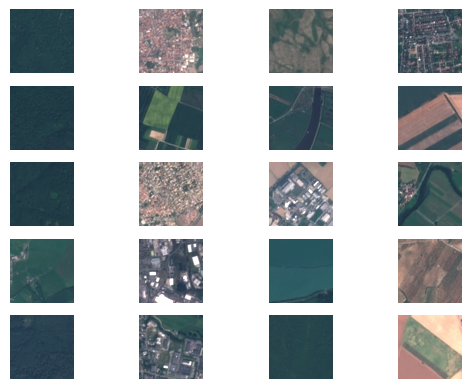

In [63]:
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(x_train_raw[i])
    plt.axis('off')
plt.show()

In [64]:
x_train_raw.shape

TensorShape([27000, 64, 64, 3])

In [65]:
x_test_raw.shape

TensorShape([18900, 64, 64, 3])

### Resize gambar dataset

In [66]:
train_data = tf.image.resize(x_train_raw, (28, 28))
test_data = tf.image.resize(x_test_raw, (28, 28))

### Reshape gambar dataset

In [67]:
train_data = np.reshape(train_data.numpy(), (27000, 2352))
test_data = np.reshape(test_data.numpy(), (18900, 2352))

In [68]:
train_data = train_data.astype('float32')/255
test_data = test_data.astype('float32')/255

## Membuat DNN (Deep Learning Network)


In [69]:
modeldata = Sequential([
        Dense(512, activation = 'relu', input_dim = (2352)),
        Dense(256, activation = 'relu'),
        Dense(36, activation = 'softmax')
    ])
modeldata.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               1204736   
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 36)                9252      
                                                                 
Total params: 1,345,316
Trainable params: 1,345,316
Non-trainable params: 0
_________________________________________________________________


### Optimisasi Model

In [70]:
modeldata.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics=['accuracy'])

### Fitting Training Model

In [71]:
data_fit = modeldata.fit(
    train_data, 
    y_train, 
    batch_size = 64, 
    epochs = 20, 
    validation_data = (test_data, y_test)
)

Epoch 1/20
422/422 [==============================] - 4s 9ms/step - loss: 2.0185 - accuracy: 0.2678 - val_loss: 1.8001 - val_accuracy: 0.3512
Epoch 2/20
422/422 [==============================] - 4s 9ms/step - loss: 1.7468 - accuracy: 0.3470 - val_loss: 1.7002 - val_accuracy: 0.4010
Epoch 3/20
422/422 [==============================] - 4s 9ms/step - loss: 1.6779 - accuracy: 0.3811 - val_loss: 1.6412 - val_accuracy: 0.4226
Epoch 4/20
422/422 [==============================] - 4s 9ms/step - loss: 1.6277 - accuracy: 0.4104 - val_loss: 1.6240 - val_accuracy: 0.3896
Epoch 5/20
422/422 [==============================] - 4s 9ms/step - loss: 1.5764 - accuracy: 0.4334 - val_loss: 1.6502 - val_accuracy: 0.3565
Epoch 6/20
422/422 [==============================] - 4s 9ms/step - loss: 1.5388 - accuracy: 0.4496 - val_loss: 1.5772 - val_accuracy: 0.4450
Epoch 7/20
422/422 [==============================] - 4s 9ms/step - loss: 1.4918 - accuracy: 0.4683 - val_loss: 1.4750 - val_accuracy: 0.4877
Epoch 

### Evaluasi Model yang telah di train

In [72]:
score = modeldata.evaluate(test_data, y_test)
print("TEST_LOSS            : ", score [0])
print("TEST_AKURASI         : ", score [1])
print("VALIDATION_LOSS      : ", data_fit.history['val_loss'][-1])
print("VALIDATION ACCURACY  : ", data_fit.history['val_accuracy'][-1])

591/591 [==============================] - 2s 3ms/step - loss: 1.1751 - accuracy: 0.5902
TEST_LOSS            :  1.1750954389572144
TEST_AKURASI         :  0.5902116298675537
VALIDATION_LOSS      :  1.1750948429107666
VALIDATION ACCURACY  :  0.5902116298675537


In [74]:
modeldata.save('./model/model_finished')
modeldata.save('./model/model_finished.h5')

INFO:tensorflow:Assets written to: ./model/model_finished\assets


INFO:tensorflow:Assets written to: ./model/model_finished\assets
